# Question 6

* In this question, we will apply histogram equalization only to the foreground of an image to produce an image with a histogram equalized foreground.

In [1]:
#Importing the necessary libraries 

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Part(a)
* Open the image and split it into hue, saturation, and values and display these planes in grayscale.

Hue plane is :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Saturation plane is :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Value plane is :  [[ 97  97  97 ...  78  78  78]
 [ 97  97  97 ...  78  78  78]
 [ 97  97  97 ...  78  78  78]
 ...
 [145 145 145 ... 116 116 116]
 [145 145 145 ... 116 116 116]
 [145 145 145 ... 116 116 116]]


Text(0.5, 1.0, 'Value Plane')

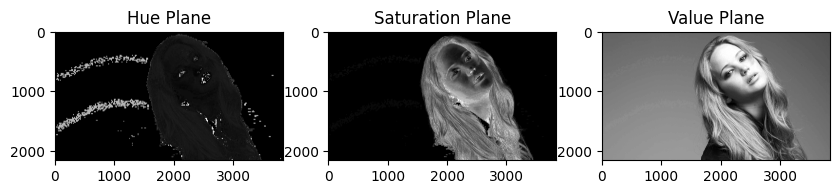

In [2]:
# Load the image
image = cv.imread('W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/jeniffer.jpg', cv.IMREAD_COLOR)

# Convert the image to the HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
hue_plane = hsv_image[:,:,0]
saturation_plane = hsv_image[:,:,1]
value_plane = hsv_image[:,:,2]

#Displaying the Planes for Reference
print('Hue plane is : ',hue_plane)
print('Saturation plane is : ',saturation_plane)
print('Value plane is : ',value_plane)

# Display the original image, binary mask, foreground, and histogram
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(hue_plane , cmap='gray')
plt.title('Hue Plane')

plt.subplot(1, 3, 2)
plt.imshow(saturation_plane, cmap='gray')
plt.title('Saturation Plane')

plt.subplot(1, 3, 3)
plt.imshow(value_plane, cmap='gray')
plt.title('Value Plane')


## Part(b)
* Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image. 

* To selecet the appropriate plane, the foreground mask was extracted from the 3 planes separately. 

Text(0.5, 1.0, 'Foreground from Value Plane')

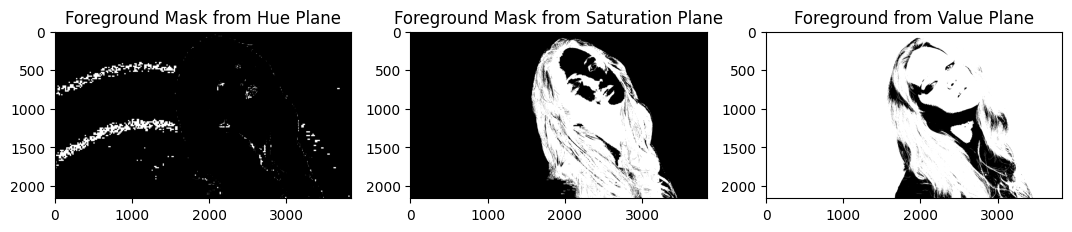

In [27]:
# Threshold the hue, saturation, and value planes to extract the foreground from the background
threshold_value = 75

_,binary_mask_1 = cv.threshold(hue_plane, threshold_value, 255, cv.THRESH_BINARY) 
_,binary_mask_2 = cv.threshold(saturation_plane, threshold_value, 255, cv.THRESH_BINARY) 
_,binary_mask_3 = cv.threshold(value_plane, threshold_value, 255, cv.THRESH_BINARY) 

# Display the original image, binary mask, foreground, and histogram
plt.figure(figsize=(13, 8))

plt.subplot(1, 3, 1)
plt.imshow(binary_mask_1, cmap='gray')
plt.title('Foreground Mask from Hue Plane')

plt.subplot(1, 3, 2)
plt.imshow(binary_mask_2, cmap='gray')
plt.title('Foreground Mask from Saturation Plane')

plt.subplot(1, 3, 3)
plt.imshow(binary_mask_3, cmap='gray')
plt.title('Foreground from Value Plane')

* It can be seen that to extract the foreground mask, the value plane plane is ideal. 
* Therefore, the value plane was selected. 

## Part (c)

* Obtain the foreground only using cv.bitwise_and and compute the histogram

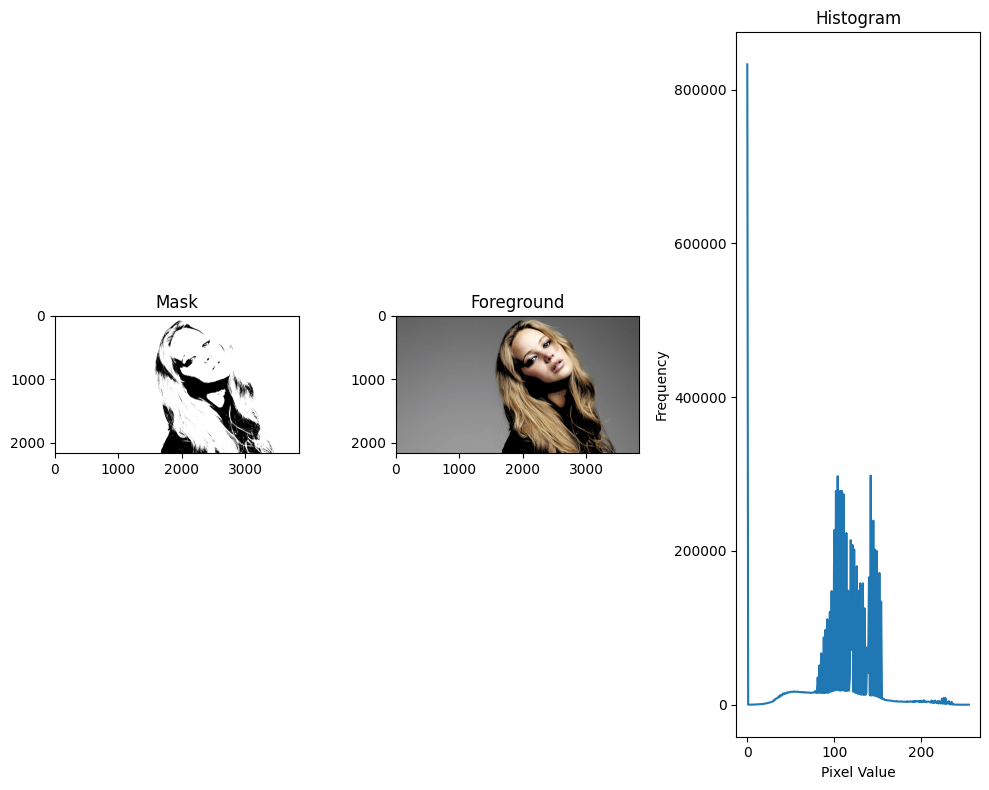

In [37]:
# Apply bitwise_and to extract the foreground pixels
foreground = cv.bitwise_and(image, image, mask=binary_mask_3)

# Compute the histogram of the foreground image
histogram = cv.calcHist([foreground], [0], None, [256], [0, 256])

# Display the original image, binary mask, foreground, and histogram
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(binary_mask_3, cmap='gray')
plt.title('Mask')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')

plt.subplot(1, 3, 3)
plt.plot(histogram)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Part(d)

* Obtain the cumulative sum of the histogram using np.cumsum.

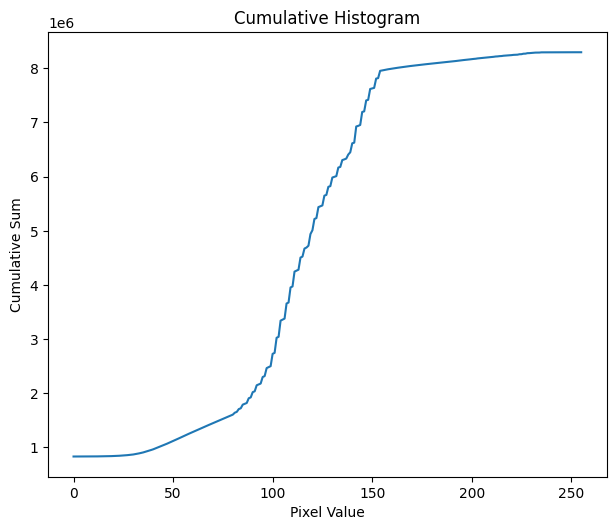

In [33]:
# Compute the cumulative histogram
cumulative_histogram = np.cumsum(histogram)

# Display the original image, binary mask, foreground, and cumulative histogram
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(cumulative_histogram)
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Sum')

plt.tight_layout()
plt.show()

## Part(e)

* Use the formulas in slides to histogram-equalize the foreground.

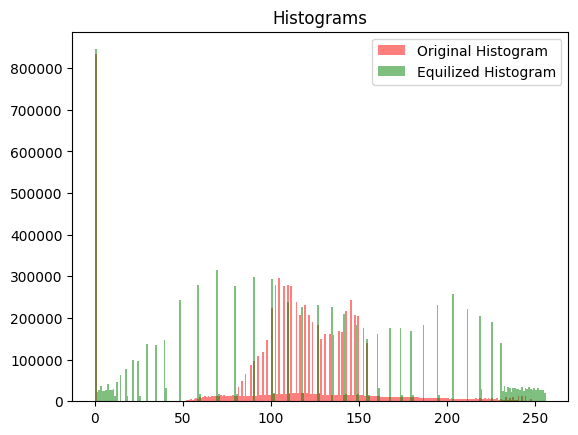

In [34]:
# Convert the foreground to grayscale for histogram equalization
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)

# Apply histogram equalization to the foreground image
equ_foreground = cv.equalizeHist(foreground_gray)

hist , bins = np.histogram(equ_foreground.ravel(),256,[0,256])

plt.hist(foreground_gray.flatten(),256,[0,256],color = 'r', alpha=0.5, label='Original Histogram')
plt.hist(equ_foreground.flatten(),256,[0,256],color = 'g', alpha=0.5, label='Equilized Histogram')

plt.legend()
plt.title('Histograms')
plt.show()

## Part (f)

* Extract the background and add with the histogram equalized foreground

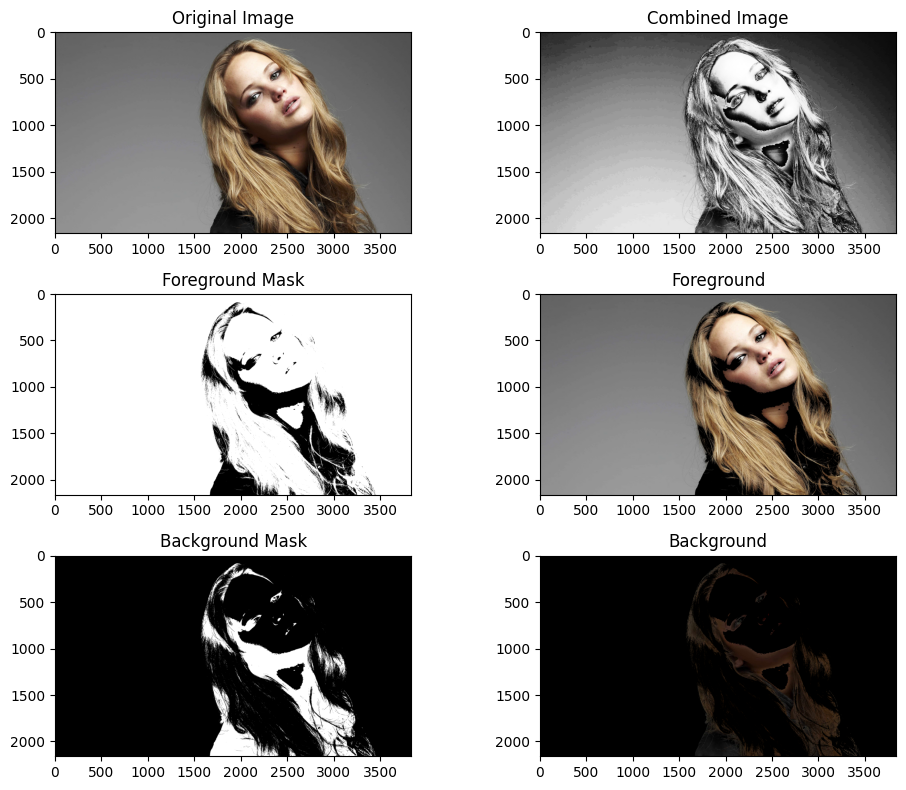

In [35]:
# Invert the binary mask to get the background mask
background_mask = cv.bitwise_not(binary_mask_3)

# Apply bitwise_and to extract the background pixels
background = cv.bitwise_and(image, image, mask=background_mask)

# Convert the background to grayscale for histogram equalization
background_gray = cv.cvtColor(background, cv.COLOR_BGR2GRAY)

# Apply histogram equalization to the background image
equ_background = cv.equalizeHist(background_gray)


result = cv.add(cv.cvtColor(equ_background, cv.COLOR_GRAY2BGR), cv.cvtColor(equ_foreground, cv.COLOR_GRAY2BGR))


# Display the original image, binary mask, foreground, and histogram
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Combined Image')

plt.subplot(3, 2, 3)
plt.imshow(binary_mask_3, cmap='gray')
plt.title('Foreground Mask')

plt.subplot(3, 2, 4)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')

plt.subplot(3, 2, 5)
plt.imshow(background_mask, cmap='gray')
plt.title('Background Mask')

plt.subplot(3, 2, 6)
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.title('Background')

plt.tight_layout()
plt.show()

## Reference Codes

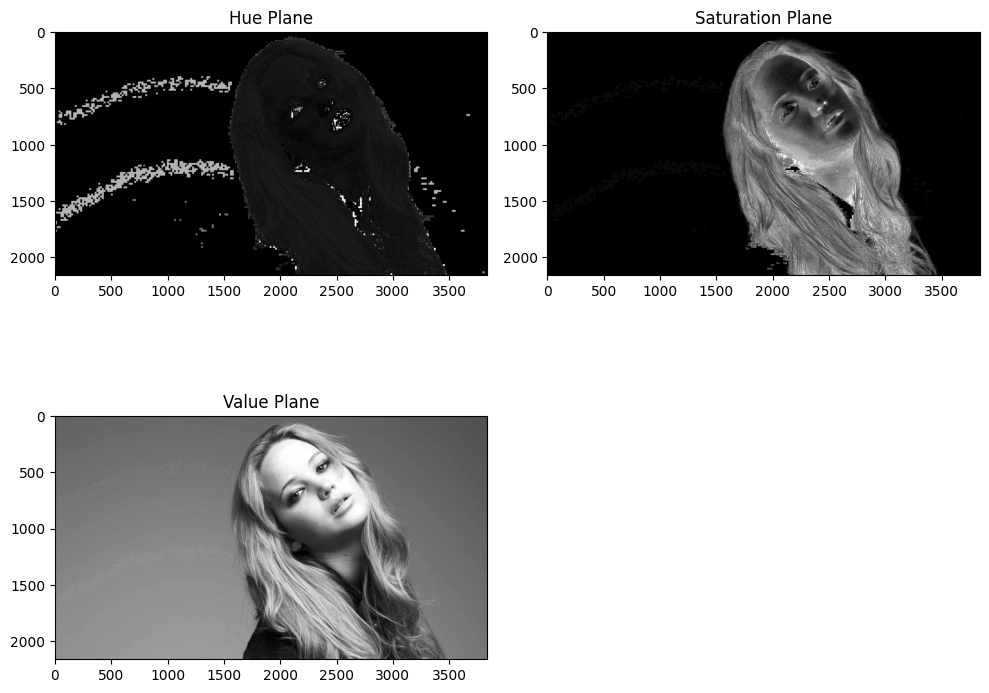

In [69]:
import cv2 as cv
import numpy as np

# Load the image
image_path = 'W:/University of Moratuwa/Academics/Semester 5/EN3160 - Image Processing and Machine Vision/Assignments/Assignment_1/Images/jeniffer.jpg'  # Replace with the actual path to your image
image = cv.imread(image_path)

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into its components
hue, saturation, value = cv.split(hsv_image)

# Display the Hue, Saturation, and Value planes in grayscale
#cv.imshow('Hue Plane', hue)
#cv.waitKey(0)
#cv.imshow('Saturation Plane', saturation)
#cv.waitKey(0)
#cv.imshow('Value Plane', value)
#cv.waitKey(0)
#cv.destroyAllWindows()

# Display the original image, binary mask, foreground, and histogram
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(hue , cmap='gray')
plt.title('Hue Plane')

plt.subplot(2, 2, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation Plane')

plt.subplot(2, 2, 3)
plt.imshow(value, cmap='gray')
plt.title('Value Plane')


plt.tight_layout()
plt.show()


In [70]:
threshold_value = 150
_,binary_mask = cv.threshold(saturation, threshold_value, 255, cv.THRESH_BINARY)

# Display the original image and the binary mask
cv.imshow('Original Image', image)
cv.waitKey(0)
cv.imshow('Binary Mask', binary_mask)

# Wait for a key press and then close the windows
cv.waitKey(0)
cv.destroyAllWindows()

print('Binary Mask is : ',binary_mask)

Binary Mask is :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


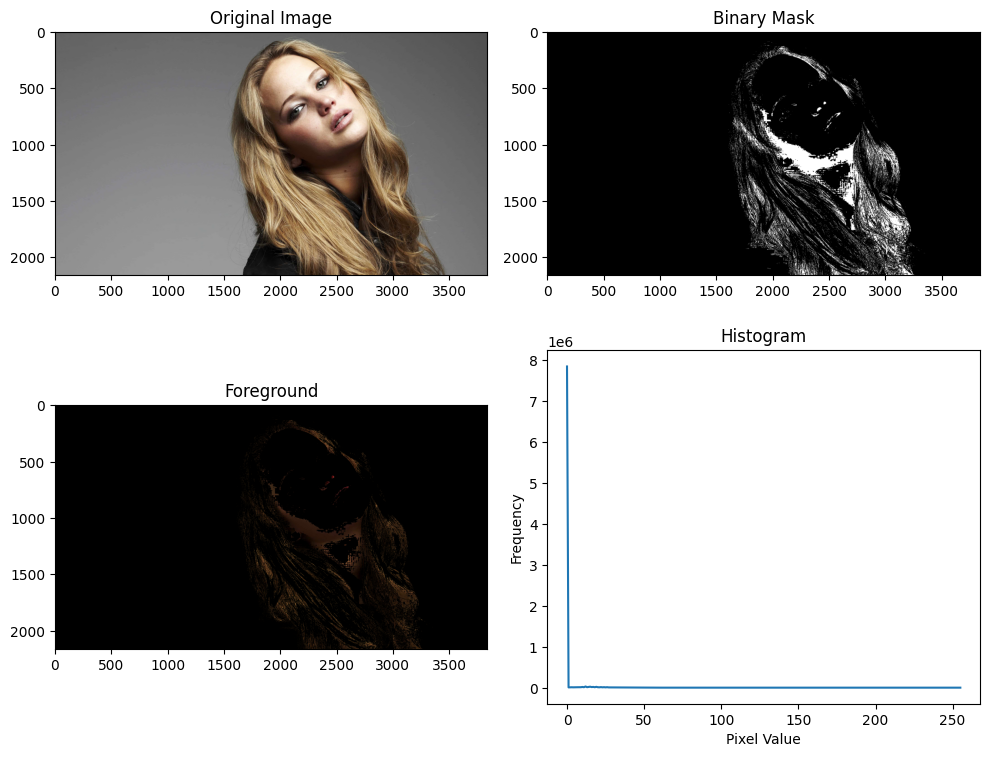

In [71]:
# Apply bitwise_and to extract the foreground pixels
foreground = cv.bitwise_and(image, image, mask=binary_mask)

# Compute the histogram of the foreground image
histogram = cv.calcHist([foreground], [0], None, [256], [0, 256])

# Display the original image, binary mask, foreground, and histogram
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')

plt.subplot(2, 2, 4)
plt.plot(histogram)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'path_to_your_image.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
_, _, value_channel = cv2.split(hsv_image)

# Threshold the value channel to create a binary mask
threshold_value = 150  # You can adjust this threshold value
binary_mask = cv2.threshold(value_channel, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Apply bitwise_and to extract the foreground pixels
foreground = cv2.bitwise_and(image, image, mask=binary_mask)

# Compute the histogram of the foreground image
histogram = cv2.calcHist([foreground], [0], None, [256], [0, 256])

# Compute the cumulative histogram
cumulative_histogram = np.cumsum(histogram)

# Display the original image, binary mask, foreground, and cumulative histogram
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Foreground')

plt.subplot(2, 2, 4)
plt.plot(cumulative_histogram)
plt.title('Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Sum')

plt.tight_layout()
plt.show()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
equ = cv.equalizeHist(img)
hist , bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized,color = 'y')
plt.hist(equ.flatten(),256,[0,256],color = 'g')
plt.xlim([0,256])
plt.legend(('cdf','Histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'path_to_your_image.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
_, _, value_channel = cv2.split(hsv_image)

# Threshold the value channel to create a binary mask
threshold_value = 150  # You can adjust this threshold value
binary_mask = cv2.threshold(value_channel, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Apply bitwise_and to extract the foreground pixels
foreground = cv2.bitwise_and(image, image, mask=binary_mask)

# Convert the foreground to grayscale for histogram equalization
foreground_gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_foreground = cv2.equalizeHist(foreground_gray)

# Display the original foreground, equalized foreground, and histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.title('Original Foreground')

plt.subplot(2, 3, 2)
plt.imshow(equalized_foreground, cmap='gray')
plt.title('Equalized Foreground')

plt.subplot(2, 3, 3)
plt.hist(foreground_gray.flatten(), bins=256, range=[0, 256], color='b', alpha=0.5, label='Original Histogram')
plt.hist(equalized_foreground.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5, label='Equalized Histogram')
plt.legend()
plt.title('Histograms')

plt.tight_layout()
plt.show()